<a href="https://colab.research.google.com/github/jungwonalicia/DataScience/blob/master/%EC%97%AC%EB%9F%AC%EC%82%AC%EB%9E%8C%EC%A4%91%EB%82%B4%EC%96%BC%EA%B5%B4%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

In [0]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [0]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)


In [14]:
img_paths = {
    'JunHyunMu': 'jun.jpg',
    'HanHyeJin': 'han.jpg',
    'ParkNaRae': 'park.jpg',
    'LeeSiUn': 'lee.jpg'
}

descs = {
    'JunHyunMu': None,
    'HanHyeJin': None,
    'ParkNaRae': None,
    'LeeSiUn': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('descs.npy', descs)
print(descs)

{'JunHyunMu': array([-0.09660652,  0.06750496,  0.08034438,  0.02189048, -0.08277052,
       -0.04196985, -0.04116984, -0.11211686,  0.09983097, -0.10410851,
        0.14123693, -0.01662835, -0.17610653, -0.10227963, -0.05419048,
        0.11656594, -0.13188207, -0.1531018 , -0.03659722,  0.03809314,
        0.14947316,  0.04883957,  0.04591722, -0.01675821, -0.10275292,
       -0.35913801, -0.06534493, -0.08486786,  0.01375232,  0.00276469,
       -0.08325174,  0.03984142, -0.20519152, -0.07281473,  0.02227463,
        0.10765359,  0.03278837, -0.06605203,  0.19378069, -0.00087518,
       -0.2749573 ,  0.05493531,  0.01710118,  0.25269613,  0.16945051,
       -0.02667585,  0.03424   , -0.11403605,  0.16264002, -0.16557796,
        0.08832473,  0.11570193,  0.17789297,  0.0311602 ,  0.01676069,
       -0.09530123,  0.05086836,  0.10750903, -0.17072664,  0.01649386,
        0.11564608, -0.08746846, -0.00905825, -0.07356165,  0.12213597,
        0.05133459, -0.04843856, -0.18114546,  0.0

In [0]:
img_bgr = cv2.imread('na.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

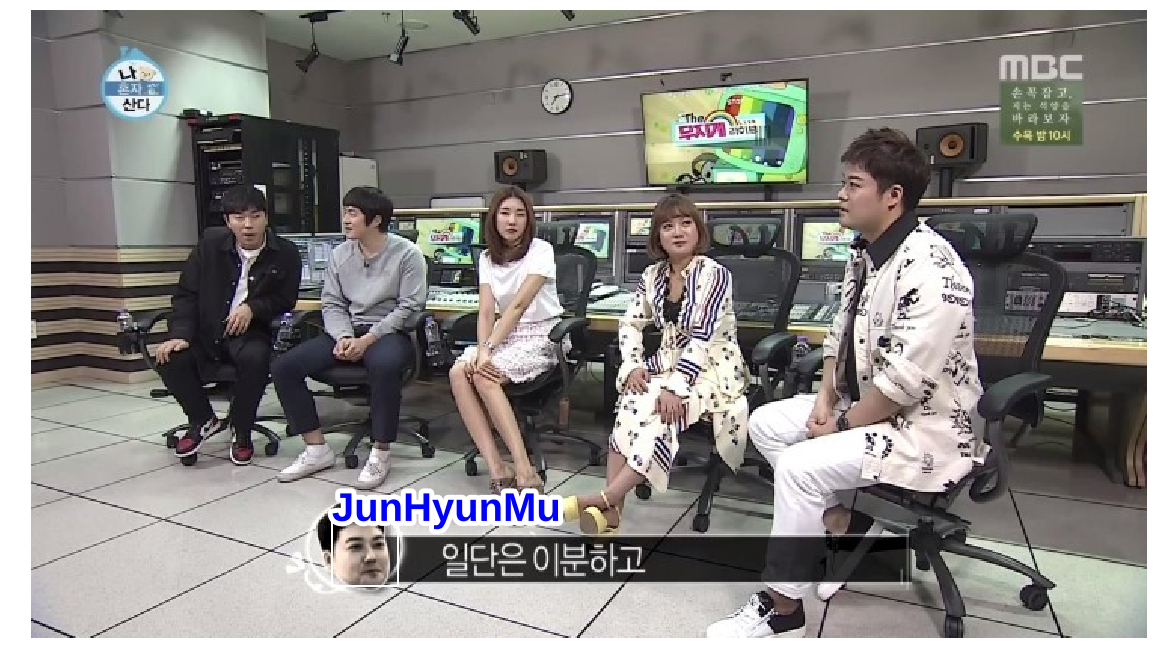

In [16]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.6:
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('output.png')
plt.show()